# Исследование объявлений о продаже квартир

**Описание задачи**

В данной работе представлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Целью исследования является определение параметров, которые влияют на рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


**План работы**

1. Предобработка данных
- изменение типа данных
- поиск и обработка явных/неявных дубликатов
- поиск и обработка пропущенных значений
- поиск и обработка аномальных значений
- добавление новых столбцов

2. Исследовательский анализ данных
- Описание основных параметров квартир
- Изучение скорости продаж
- Изучение влияния различных факторов на полную стоимость объекта
- Анализ стоимости одного квадратного метра
- Анализ средней цены каждого километра

3. Подготовка общего вывода

**Описание данных**

1. real_estate_data.csv - архив объявлений за несколько лет, где:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

# Общий вывод

В данной работе был изучен набор данных объявлений о продаже недвижимости в Санкт-Петербурге и пригороде, опубликованных за период с 2014 по 2019 года.

В процессе предобработки данных были заменены пропущенные значения и удалены аномальные данные, не влияющие на дальнейший анализ. Из первоначального массива данных было удалено ~2 % от общего количества строк.

В базе данных объявлений представлены квартиры разного ценового диапазона: от квартир за 1 млн. рублей до недвижимости за несколько сотен млн. рублей. Основной массив данных представлен 1-2х комнатными квартирами стоимостью до 10 млн рублей, расположенных с 1го по 5ый этажи и в пределах до 40 км от аэропорта.

Также были исследованы факторы, влияющие на стоимость квартиры. Было определено, что общая площадь и площадь кухни наиболее сильно влияют на конечную стоимость объекта. Наиболее дешёвые квартиры расположены на первом этаже. Средняя стоимость квартир снижалась с 2014 по 2018 года с последующим увеличением в 2019. Остальные факторы (день, месяц публикации) не влияют на стоимость квартиры. 

Дополнительно была проанализирована скорость покупки объекта с момента публикации объявления. Было определено, что чаще всего квартиры продаются в течение 200 дней с даты размещения объявления.

Среди первых 10 населённых пунктов с наибольшим количеством объявлений максимальную среднюю стоимость одного квадратного метра имеют квартиры, расположенные в Санкт-Петербурге.

Дополнительно для квартир в Санкт-Петербурге была изучена зависимость стоимости одного квадратного метра от удалённости от центра. Было отмечено снижение стоимости квадратного метра при удалении от центра города. Выделяется несколько пиков для квартир, расположенных на расстоянии 1, 7 и 27 км от центра города. Пики показывают, что в данных местах есть квартиры с высокой стоимостью.


## Изучение общей информации 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

except:
    data = pd.read_csv('/my_folder_with_files/logs_exp.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

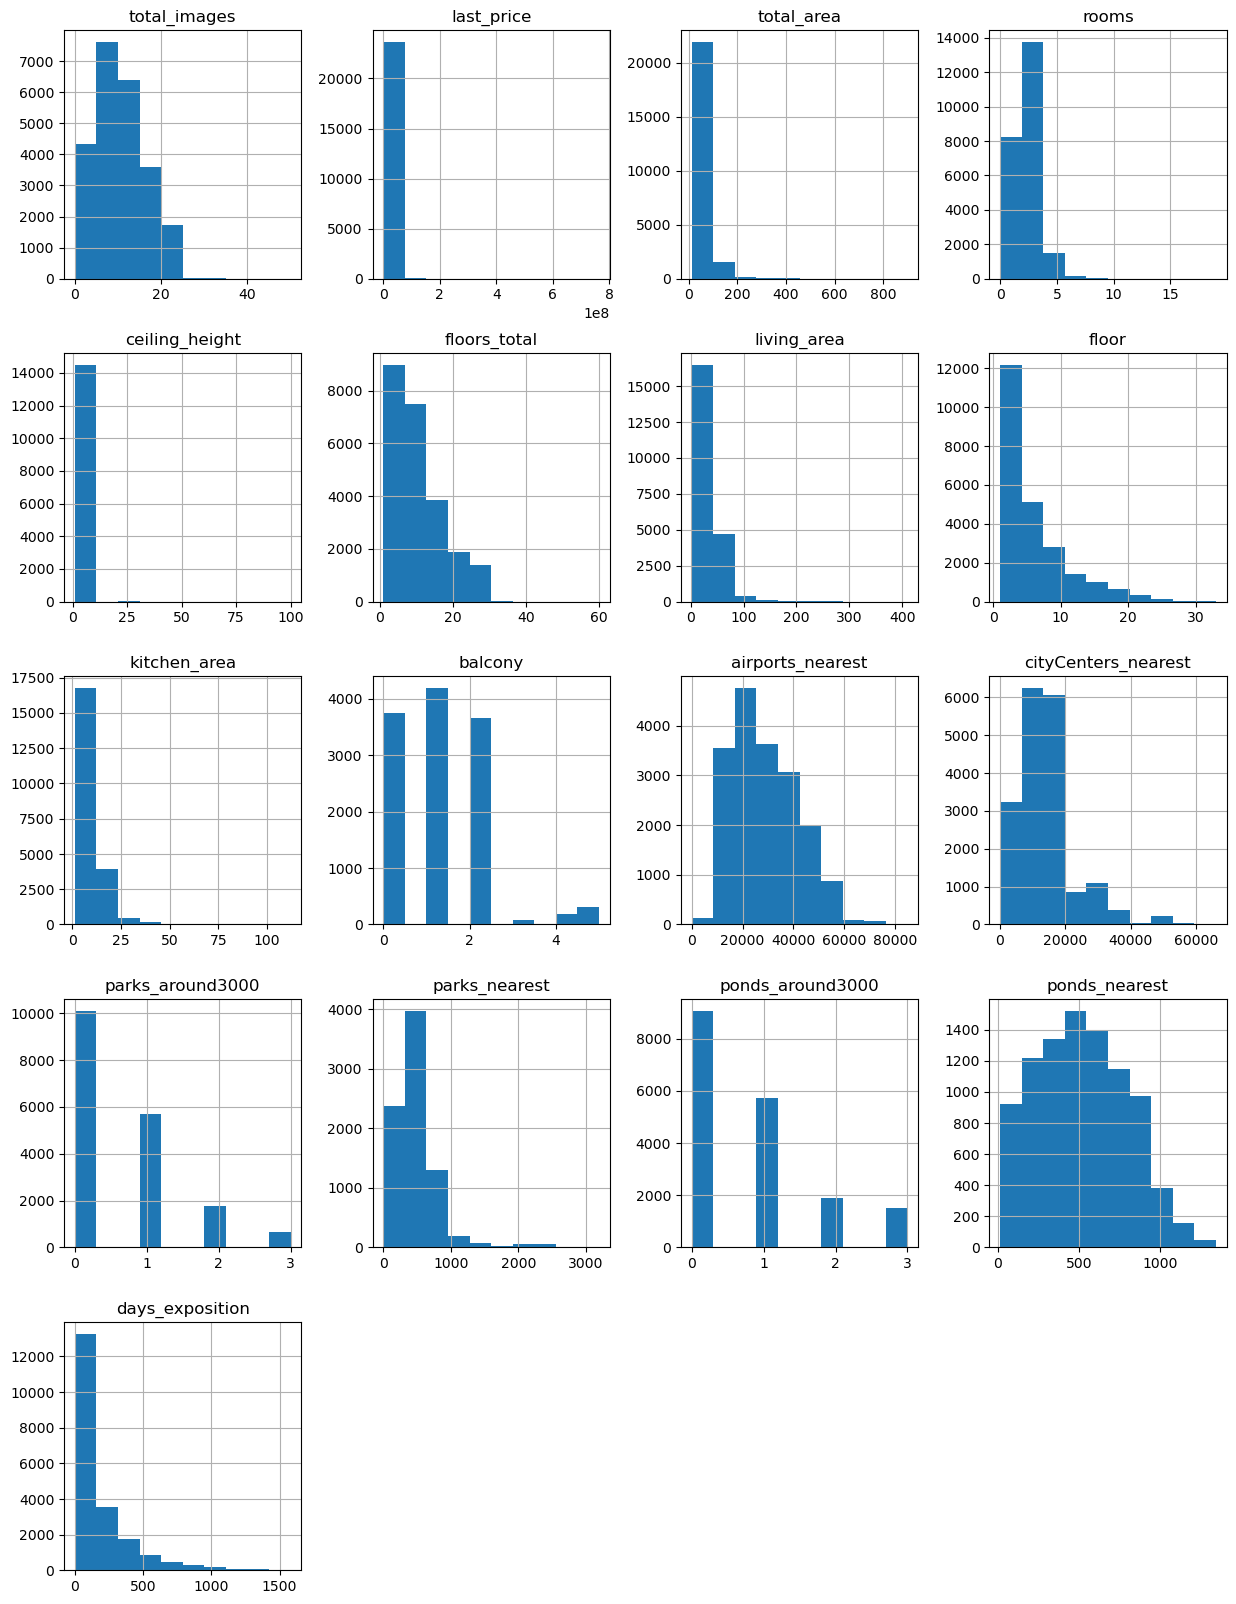

In [5]:
data.hist(figsize=(15,20));

Вывод: 
1. Пропуски в данных отмечаются в 14 столбцах из 22. Наибольшее количество пропусков отмечается в столбце is_apartment
2. В столбцах first_day_exposition, is_apartment указан неверный тип данных. Данные в столбце first_day_exposition необходимо поменять на тип datetime для дальнейшего анализа. Тип данных в столбце is_apartment можно не менять, так как эта информация не пригодится для исследования.
3. Исходя из анализа гистограмм, можно сделать вывод, что в столбцах total_images, last_price, total_area, rooms, ceiling_height, floors_total, living_area, kitchen_area встречаются аномальные значения. В столбцах ceiling_height и floors_total наблюдаются некорректные значения. Например, потолки высотой 100 метров или квартиры, расположенные в 60-этажном доме.

## Предобработка данных

### Изменение типа данных

In [6]:
#изменение типа данных в столбце 'first_day_exposition' с object на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


В столбце first_day_exposition тип данных был изменён с object на datetime для того, чтобы при дальнейшем анализе можно было выборочно вычленять данные из этого столбца. Например, создать отдельный столбец с указанием только года или месяца. 

### Поиск пропущенных значений

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Устранение дубликатов

In [8]:
#поиск явных дубликатов
data.duplicated().sum()

0

Вывод: явные дубликаты не обнаружены. Следующий шаг - обработка неявных дубликатов.

In [9]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Вывод: после анализа уникальных значений населённых пунктов можно выявить неявные дубликаты. Например, Мурино и посёлок Мурино, Кудрово и деревня Кудрово. Для устранения неявных дубликатов необходимо удалить категорию и оставить только название населённого пункта.

In [10]:
#составление списка уникальных значений категорий населённых пунктов для замены на '' с последующим удалением пробелов перед названиями объектов 
data['locality_name'] = data['locality_name'].replace(['посёлок', 'поселок', 'городской посёлок', 'городской поселок',
'поселок городского типа', 'посёлок городского типа', 'поселок городского типа имени', 'поселок станции', 'деревня', 'садовое товарищество',
'село', 'садоводческое некоммерческое товарищество', 'посёлок при железнодорожной станции', 'коттеджный поселок', 'городской', 
'городского типа', 'имени', 'при железнодорожной станции', 'станции', 'коттеджный', 'Пансионат'], '', regex=True)

data['locality_name'] = data['locality_name'].str.lstrip()

In [11]:
data['locality_name'].value_counts()

Санкт-Петербург            15721
Мурино                       590
Кудрово                      472
Шушары                       440
Всеволожск                   398
                           ...  
Пельгора                       1
Каложицы                       1
Платформа 69-й километр        1
Почап                          1
Дзержинского                   1
Name: locality_name, Length: 305, dtype: int64

Вывод: после обработки неявных дубликатов количество уникальных значений населённых пунктов сократилось с 364 до 305

### Замена пропущенных значений

Пропущенные значение были обнаружены в 14 столбцах из 22. Ниже описан процесс обработки пропущенных значений по каждому столбцу.

#### Замена пропущенных значений в столбцах ceiling_height, floors_total, is_apartment, balcony, locality_name, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, is_apartment

ceiling_height - пропущенные значения могут быть заменены на медианное значение высоты потолков, так как этот показатель регламентируется строительными нормами, поэтому большой разнос этой величины не ожидается. \
floors_total - учитывая, что этажность жилых зданий варьируется в значительных пределах, замена пропущенных значений средним арифметическим или медианным значением сильно исказит данные. Количество строк с пропусками в этом столбце незначительно (менее 1 %), поэтому данные строки могут быть удалены \
balcony - пропущенные значения, скорее всего, указывают на отсутствие балкона. Данные значения будут заменены на 0. \
locality_name - строки с пропусками в данном столбце необходимо оставить без изменений. Имеющиеся данные в других столбцах могут быть использованы для анализа. \
parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - пропущенные значения, скорее всего, указывают на отсутствие парка или пруда. Данные значения будут заменены на 0. \
days_exposition - пропущенные значения могут говорить о том, что на момент создания архива данные объекты не были проданы. Замена пропущенных значений не требуется. \
is_apartment - замена не требуется, так как для последующего анализа эти данные не понадобятся \
airports_nearest, cityCentre_nearest - пропущенные значения необходимо оставить без изменений, так как замена арифметическим или медианным значением сильно исказит данные.


In [12]:
#замена пропущенных значений в определенных столбцах на 0
values = {'balcony': 0, 'parks_around3000':0, 'parks_nearest':0, 'ponds_around3000':0, 'ponds_nearest':0}
data = data.fillna(values)
data.head()

#замена пропущенных значений медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#удаление пропущенных значений в столбце floors_total
data = data.dropna(subset=['floors_total'])

#### Замена пропущенных значений в столбцах living_area, kitchen_area

Пропущенные значения могут быть заменены на медианное значение после группирования по количеству комнат. Перед группировкой и расчётом медианы необходимо исключить квартиры-студии, квартиры со свободной планировкой и квартиры с количеством комнат 0, так как в таких квартирах площадь жилой или кухонно зоны могут сильно отличаться от стандартных значений. Как видно из сводной таблицы ниже, площадь жилой и кухонной зон увеличивается с увеличением количества комнат. Для квартир с количеством комнат более 7 пропущенные значения не будут заменены медианой из-за недостаточного количества данных.

In [13]:
#создание отфильтрованного датафрейма 
data_sorted = data.query('rooms != 0 & open_plan != True & studio != True')

In [14]:
#создание сводной таблицы для расчёта количества строк и медианы
data_sorted.pivot_table(index='rooms', values={'living_area', 'kitchen_area'} , aggfunc={'median', 'count'})

kitchen_area         living_area         
             count  median       count   median
rooms                                          
1             7203    9.00        7354   17.600
2             7270    8.70        7278   30.500
3             5369    9.50        5351   45.000
4             1080   11.05        1086   63.500
5              285   15.10         292   91.785
6               96   19.75          98  124.400
7               52   20.00          53  145.000
8                9   25.00          12  161.000
9                7   14.30           7  179.200
10               3   19.80           3  161.400
11               2   12.60           2  133.900
12               1  112.00           1  409.700
14               2   21.25           2  195.150
15               1  100.00           1  409.000
16               1   13.00           1  180.000
19               1   27.60           1  264.500

In [15]:
#заполнение пропусков в столбце 'kitchen_area' медианой
for item in data['rooms'].unique():
    data.loc[(data['rooms'] == item) & (item > 0) & (item < 8) & (data['open_plan'] != True) 
             & (data['studio'] != True) & (data['kitchen_area'].isna()), 'kitchen_area' ] = \
    data.loc[(data['rooms'] == item) & (data['open_plan'] != True) 
             & (data['studio'] != True) , 'kitchen_area'].median()
    
print(f"Количество пропущенных значений в столбце kitchen_area - {data['kitchen_area'].isna().sum()}")

Количество пропущенных значений в столбце kitchen_area - 217


In [16]:
#заполнение пропусков в столбце 'living_area' медианой
for item in data['rooms'].unique():
    data.loc[(data['rooms'] == item) & (item > 0) & (item < 8) & (data['open_plan'] != True) 
             & (data['studio'] != True) & (data['living_area'].isna()), 'living_area' ] = \
    data.loc[(data['rooms'] == item) & (data['open_plan'] != True) 
             & (data['studio'] != True) , 'living_area'].median()
    
print(f"Количество пропущенных значений в столбце living_area - {data['living_area'].isna().sum()}")

Количество пропущенных значений в столбце living_area - 13


Вывод: после заполнения пропусков количество пропущенных значений уменьшилось с 2278 до 217 в столбце 'kitchen_area' и с 1903 до 13 в столбце 'living_area'

#### Обработка аномальных значений

Исходя из анализа гистограмм, построенных в шаге 1, можно заметить, что аномальные значения присутствуют в столбцах kitchen_area, living_area, floors_total, ceiling_height, rooms, total_area, last_price

#### Обработка аномальных значений в столбце kitchen_area

Количество объектов с площадью кухни больше 60 квадратных метров незначительно и может быть удалено.

In [17]:
#удаление строк с площадью кухни более 60 квадратных метров
data = data[data['kitchen_area'] < 60]

#### Обработка аномальных значений в столбце living_area

Количество объектов с площадью жилой зоны больше 200 квадратных метров незначительно и может быть удалено.

In [18]:
#удаление строк с площадью жилой зоны более 200 квадратных метров
data = data[data['living_area'] < 200]

#### Обработка аномальных значений в столбце floors_total

Согласно информации из открытых источников, максимальное количество этажей в жилом доме в Ленинградской области - 37 этажей (жилой комплекс "Князь Александр Невский". Следовательно, значения больше 37 являются аномальными.

In [19]:
#поиск строк с количеством этажей более 37
data[data['floors_total'] > 37]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,0.0,45.0


Вывод: строки с аномальными значениями будут заменены на -1, а не удалены, так как остальные данные по этим строкам могут быть полезны для дальнейшего исследования.

In [20]:
#замена аномальных значений на -1
data.loc[data['floors_total'] > 37, 'floors_total'] = -1

#### Обработка аномальных значений в столбце ceiling_height

In [21]:
#вывод на экран уникальных значений в столбце ceiling_height
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Вывод: среди уникальных значений отмечаются аномалии в виде потолков высотой менее 2 метров и более 8 метров. Значения более 8 метров, скорее всего, записаны неправильно. Для дальнейшего анализа строки с высотой потолков более 8 метров необходимо разделить на 10, строки со значениями менее 2 м и более 8 метров будут удалены.

In [22]:
#изменение высота потолков в строках со значениями более 8 метров 
data.loc[data['ceiling_height'] > 8, 'ceiling_height'] = (data['ceiling_height'] / 10)

#удаление строк с высотой потолков до 2 метров и более 8 метров
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 8)]

#### Обработка аномальных значений в столбце rooms

In [23]:
#вывод на экран уникальных значений в столбце rooms
data['rooms'].value_counts()

1     7990
2     7904
3     5776
4     1169
5      314
6      100
7       46
8        8
9        5
10       3
11       2
16       1
14       1
Name: rooms, dtype: int64

Вывод: количество объектов с 8мью и более комнатами недостаточно для корректного анализа, поэтому данные строки могут быть удалены.

In [24]:
#удаление строк с количеством комнат более 7
data = data[data['rooms'] < 8]

#### Обработка аномальных значений в столбце total_area

Исходя из гистограммы, построенной в шаге 1, можно заметить, что количество объектов с общей площадью больше 300 квадратных метров незначительно и может быть удалено.

In [25]:
#удаление строк с общей площадью более 300 квадратных метров
data = data[data['total_area'] < 300]

#### Обработка аномальных значений в столбце last_price

Исходя из гистограммы, построенной в шаге 1, можно заметить, что количество объектов стоимостью более 75 млн рублей незначительно и может быть удалено.

In [26]:
#удаление строк с квартирами стоимостью более 75 млн рублей
data = data[data['last_price'] < 75000000]

Вывод: после проведения предобработки данных количество строк уменьшилось с 23699 на 23234. Строки с аномальными значениями были удалены, либо заменены на медианное значение.

In [27]:
data_old = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
print(f"В процессе предобработки было удалено {round((1 - data.shape[0] / data_old.shape[0]) * 100, 2)} % данных")

В процессе предобработки было удалено 1.96 % данных


### Добавление новых столбцов

In [28]:
#добавление столбца с расчётом цены одного квадратного метра 
data['square_meter_price'] = (data['last_price'] / data['total_area']).round(0)

#добавление столбцов с указанием месяца, года и дня недели
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['day_name'] = data['first_day_exposition'].dt.weekday

#создание функции для категоризации данных из столбца floor, создания нового столбца с 3мя категориями («первый», «последний», «другой»)
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применение метода apply() для создания нового столба с категориями этажей    
data['floor_group'] = data.apply(floor_group, axis=1)

#добавление столбца с указанием расстояния от центра в километрах
data['cityCentres_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)    
    
#вывод нескольких строк для проверки результатов
data.loc[11:14, :]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,month,year,day_name,floor_group,cityCentres_nearest_km
11,9,3300000.0,44.0,2018-08-27,2,2.65,5.0,31.0,4,False,False,False,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,0.0,0.0,0.0,7.0,75000.0,8,2018,0,другой,52.0
12,10,3890000.0,54.0,2016-06-30,2,2.65,5.0,30.0,5,NaN,False,False,9.0,0.0,Сертолово,NaN,NaN,0.0,0.0,0.0,0.0,90.0,72037.0,6,2016,3,последний,NaN
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,NaN,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82944.0,7,2017,5,последний,33.0
14,1,4400000.0,36.0,2016-06-23,1,2.65,6.0,17.0,1,NaN,False,False,8.0,0.0,Пушкин,20782.0,30759.0,0.0,0.0,1.0,96.0,203.0,122222.0,6,2016,3,первый,31.0


## Исследовательский анализ данных

### Описание параметров

In [29]:
data[['total_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_group', \
      'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest']].describe()

,total_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest
count,23234.000000,23234.000000,2.323400e+04,23234.000000,23234.000000,23234.000000,23234.000000,17823.000000,17802.00000,23234.000000
mean,59.163184,10.308201,6.072318e+06,2.065507,2.694152,5.860291,10.640312,14250.790888,28840.08544,166.977748
std,28.912493,5.039246,5.398615e+06,1.002221,0.212552,4.861117,6.561730,8621.113072,12655.95403,306.152804
min,12.000000,1.300000,1.219000e+04,1.000000,2.200000,1.000000,-1.000000,181.000000,0.00000,0.000000
25%,40.100000,7.200000,3.450000e+06,1.000000,2.600000,2.000000,5.000000,9329.000000,18551.25000,0.000000
50%,52.000000,9.000000,4.650000e+06,2.000000,2.650000,4.000000,9.000000,13123.000000,26801.00000,0.000000
75%,69.300000,11.500000,6.750000e+06,3.000000,2.700000,8.000000,16.000000,16298.500000,37334.75000,302.000000
max,297.500000,58.400000,7.400000e+07,7.000000,5.500000,33.000000,36.000000,65968.000000,84869.00000,3190.000000


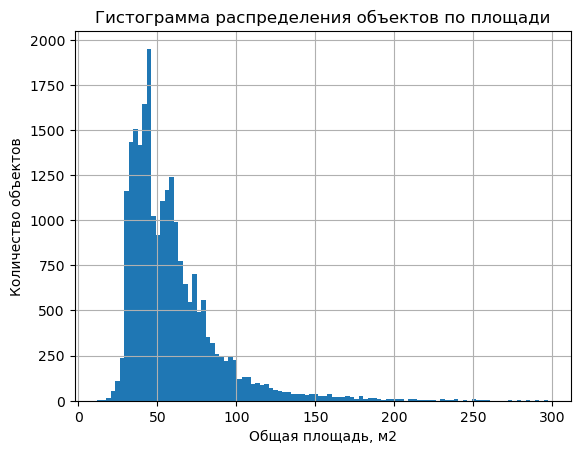

In [30]:
#построение гистограммы по столбцу total_area
data['total_area'].hist(bins=100, legend=False)
plt.xlabel('Общая площадь, м2')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по площади');

Вывод: на гистограмме отмечаются два пика (квартиры с общей площадью ~40 и 60 квадратных метров)

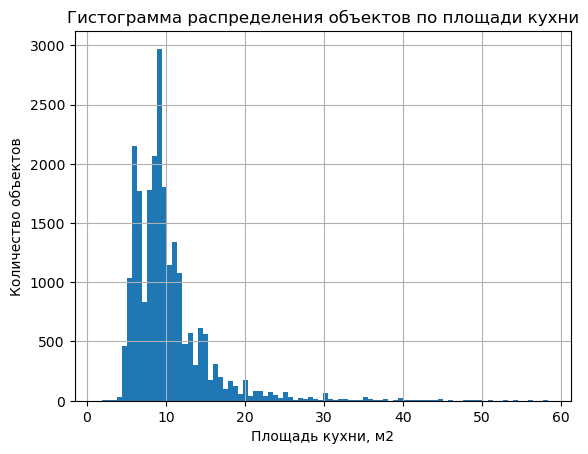

In [31]:
#построение гистограммы по столбцу kitchen_area
data['kitchen_area'].hist(bins=90, legend=False)
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по площади кухни');

Вывод: на гистограмме отмечаются два пика (квартиры с площадью кухни ~6 и 9 квадратных метров)

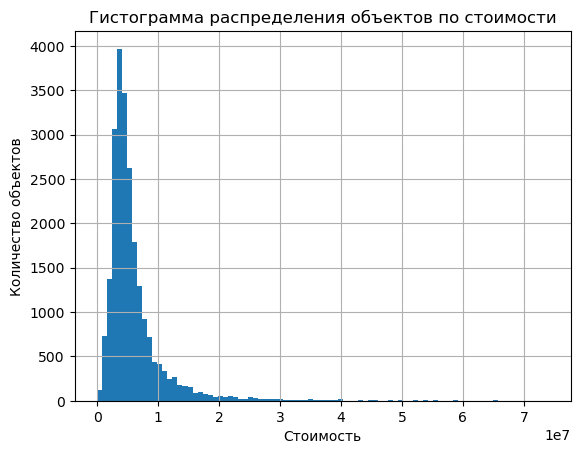

In [32]:
#построение гистограммы по столбцу last_price
data['last_price'].hist(bins=90, legend=False)
plt.xlabel('Стоимость')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по стоимости');

Вывод: основной массив объявлений находится в промежутке до 10 млн рублей

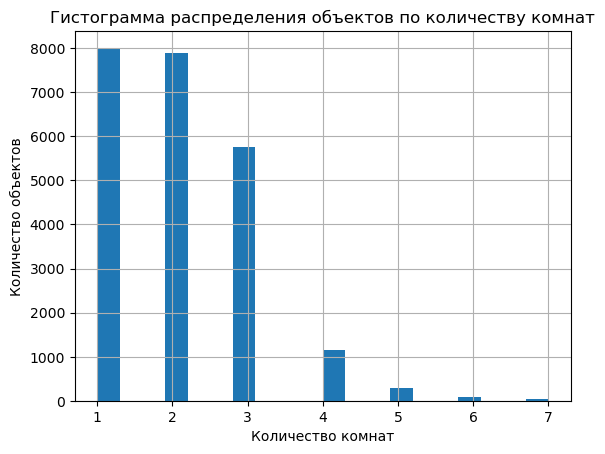

In [33]:
#построение гистограммы по столбцу rooms
data['rooms'].hist(bins=20, legend=False)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по количеству комнат');

Вывод: в данной базе объявлений, в основном, присутствуют 1 - 2х комнатные квартиры 

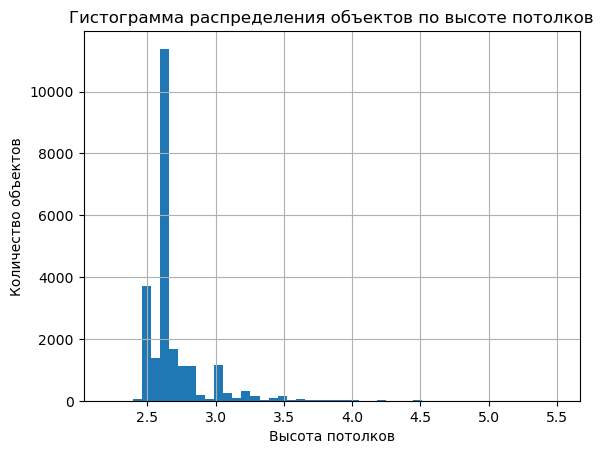

In [34]:
#построение гистограммы по ceiling_height
data['ceiling_height'].hist(bins=50, legend=False)
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по высоте потолков');

Вывод: наибольшее количество квартир имеют высоту потолков 2.65 метра

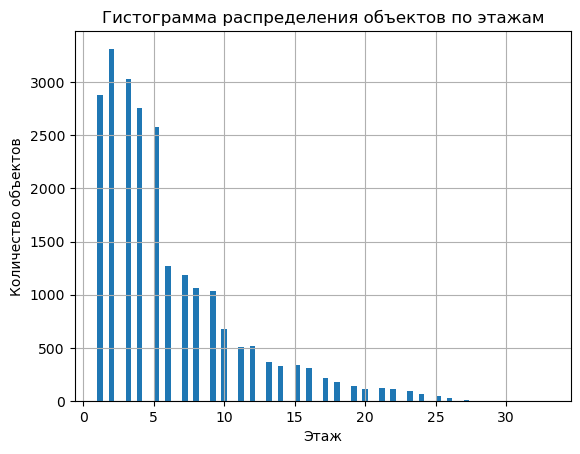

In [35]:
#построение гистограммы по floor
data['floor'].hist(bins=80, legend=False)
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по этажам');

Вывод: наибольшее количество объявлений приходится на квартиры, расположенные с 1 по 5 этажи

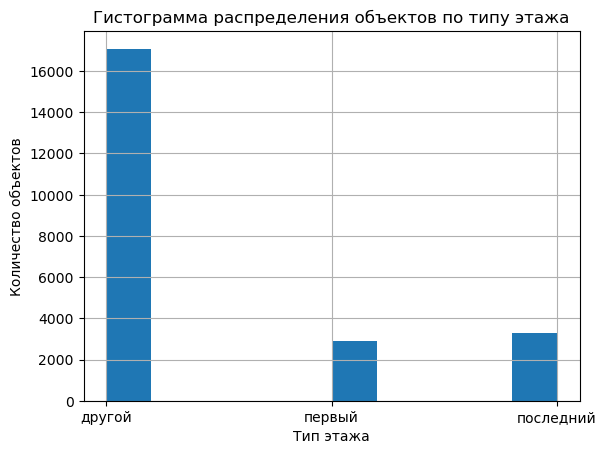

In [36]:
#построение гистограммы по floor_group
data['floor_group'].hist(legend=False)
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по типу этажа');

Вывод: наибольшее количество объявлений приходится на квартиры, расположенные не на первом и не на последнем этажах

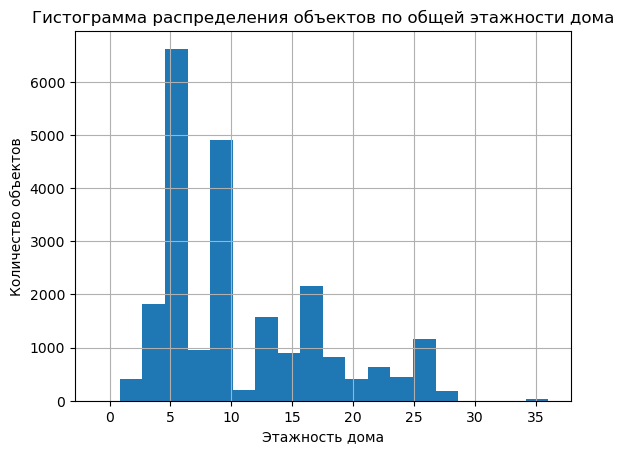

In [37]:
#построение гистограммы по floors_total
data['floors_total'].hist(bins=20, legend=False)
plt.xlabel('Этажность дома')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по общей этажности дома');

Вывод: на гистограмме выделяются 2 пика (квартиры, расположенные в 5ти и 9ти этажных домах) 

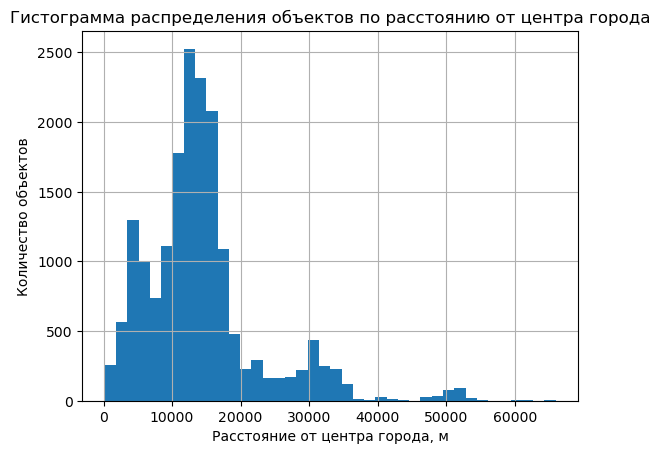

In [38]:
#построение гистограммы по cityCenters_nearest
data['cityCenters_nearest'].hist(bins=40, legend=False)
plt.xlabel('Расстояние от центра города, м')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по расстоянию от центра города');

Вывод: на гистограмме выделяются 3 пика (квартиры, расположенные в 5, 12-15, 21 км от центра города) 

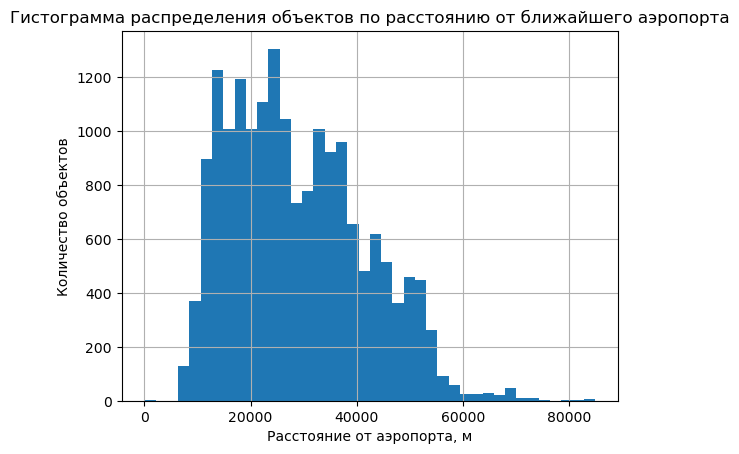

In [39]:
#построение гистограммы по airports_nearest
data['airports_nearest'].hist(bins=40, legend=False)
plt.xlabel('Расстояние от аэропорта, м')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по расстоянию от ближайшего аэропорта');

Вывод: основной массив объявлений находится в промежутке от 0 до 40 км от аэропорта.

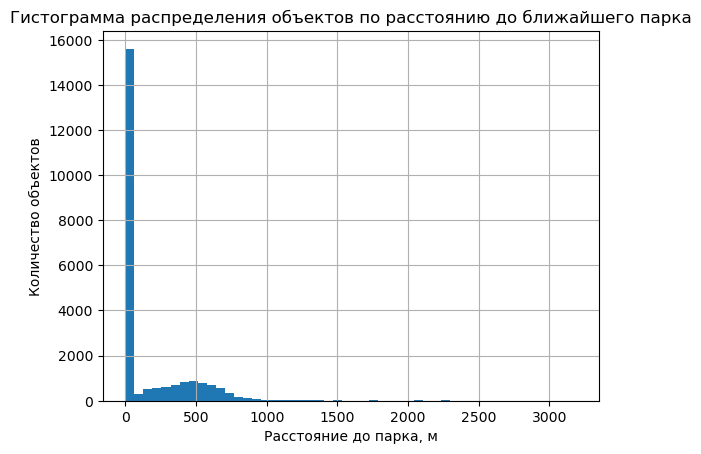

In [40]:
#построение гистограммы по parks_nearest
data['parks_nearest'].hist(bins=50, legend=False)
plt.xlabel('Расстояние до парка, м')
plt.ylabel('Количество объектов')
plt.title('Гистограмма распределения объектов по расстоянию до ближайшего парка');

Вывод: на гистограмме отмечается резкий выброс нулевых значений, который говорит о том, что возле большинства квартин не расположено ни одного парка.

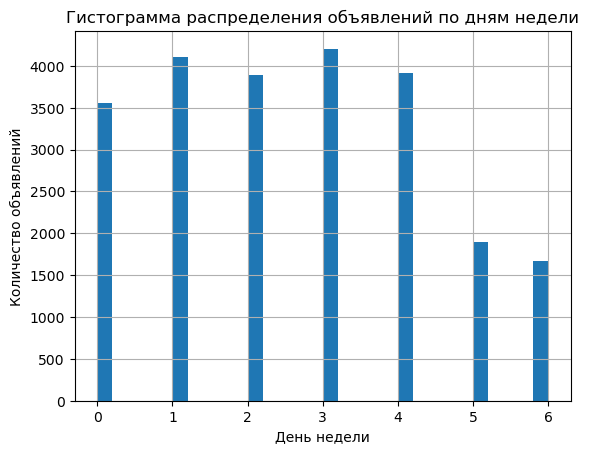

In [41]:
#построение гистограммы по day_name
data['day_name'].hist(bins=30, legend=False)
plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма распределения объявлений по дням недели');

Вывод: количество объявлений, размещённых с понедельника по пятницу примерно одинаково. Отмечается резкое снижение опубликованных объявлений в субботу и воскресенье

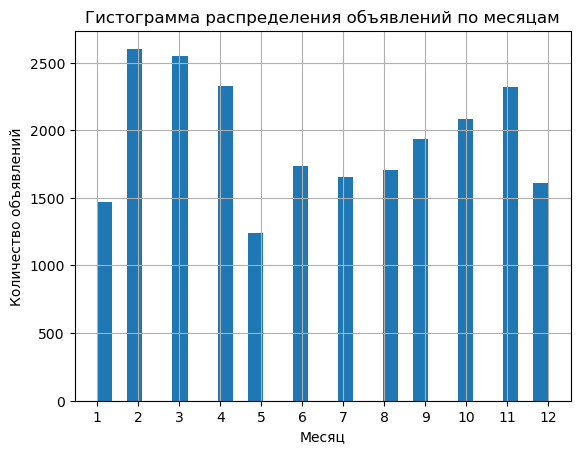

In [42]:
#построение гистограммы по month
data['month'].hist(bins=30, legend=False)
plt.xlabel('Месяц')
plt.xticks(np.arange(1, 13, 1))
plt.ylabel('Количество объявлений')
plt.title('Гистограмма распределения объявлений по месяцам');

Вывод: наибольшее количество объявлений размещается в период с февраля апрель. В мае наблюдается минимально количество размещённых объявлений с последующим увеличением до ноября. В декабре и январе количество опубликованных объявлений примерно одинаково

### Изучение скорости продаж

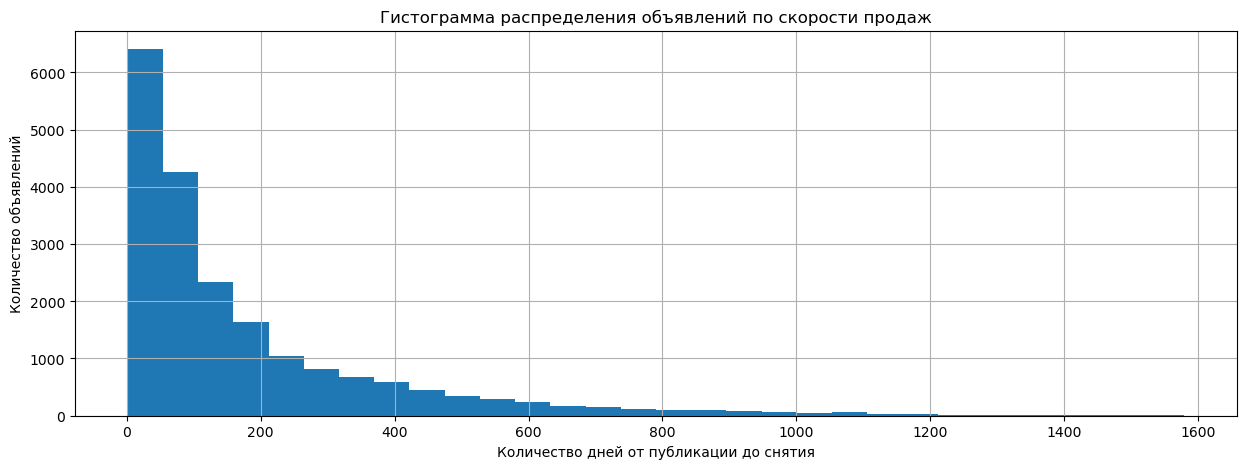

In [43]:
#построение гистограммы
data['days_exposition'].hist(bins=30, figsize=(15, 5), legend=False)
plt.xlabel('Количество дней от публикации до снятия')
plt.ylabel('Количество объявлений')
plt.title('Гистограмма распределения объявлений по скорости продаж');

In [44]:
#расчёт среднего арифметического
print(f"Среднее арифметическое - {round(data['days_exposition'].mean(),0)}")

#расчёт медианы
print(f"Медианное значение - {data['days_exposition'].median()}")

Среднее арифметическое - 181.0
Медианное значение - 96.0


Вывод: большинство квартир было продано в промежуток от 0 до 200 дней с момента публикации объявления. Среднее арифметическое в 2 раза превышает медианное значение, так как в выборке присутствуют объекты, проданные через продолжительное время (1000 дней и более). Быстрыми продажами можно считать объекты, которые были проданы в течение 50 дней после размещения объявления. Медленными продажами можно считать те квартиры, которые были проданы через 200 и более дней после размещения объявления. 

### Изучение влияния различных факторов на полную стоимость объекта

Коэффициент корреляции - 0.766


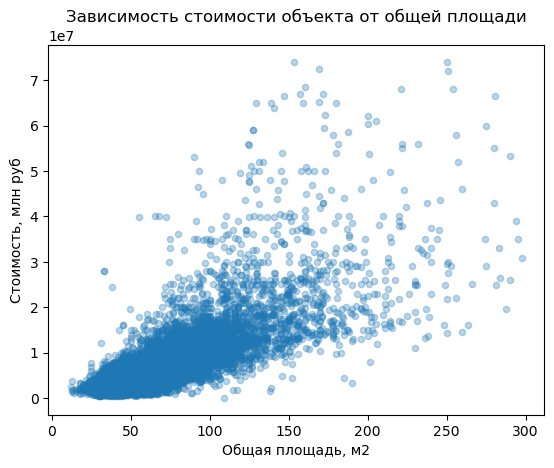

In [45]:
#расчёт коэффициента корреляции
print(f"Коэффициент корреляции - {data['last_price'].corr(data['total_area']).round(3)}")

#построение графика зависимости стоимости объекта от общей площади
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.title('Зависимость стоимости объекта от общей площади')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Стоимость, млн руб');

Вывод: Отмечается положительная корреляция между общей площадью и стоимостью квартиры

Коэффициент корреляции - 0.556


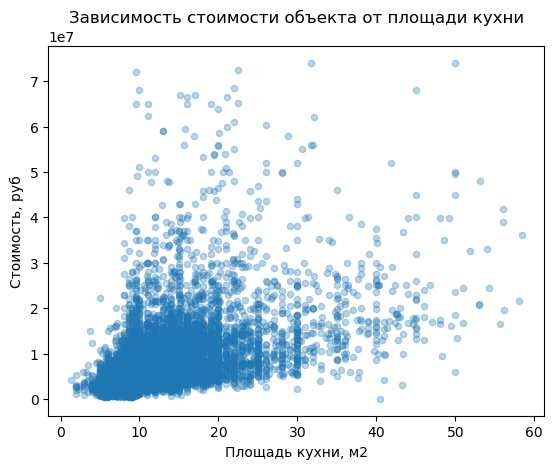

In [46]:
#расчёт коэффициента корреляции
print(f"Коэффициент корреляции - {data['last_price'].corr(data['kitchen_area']).round(3)}")

#построение графика зависимости стоимости объекта от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.title('Зависимость стоимости объекта от площади кухни')
plt.xlabel('Площадь кухни, м2')
plt.ylabel('Стоимость, руб');

Вывод: Отмечается положительная корреляция между площадью кухни и стоимостью квартиры

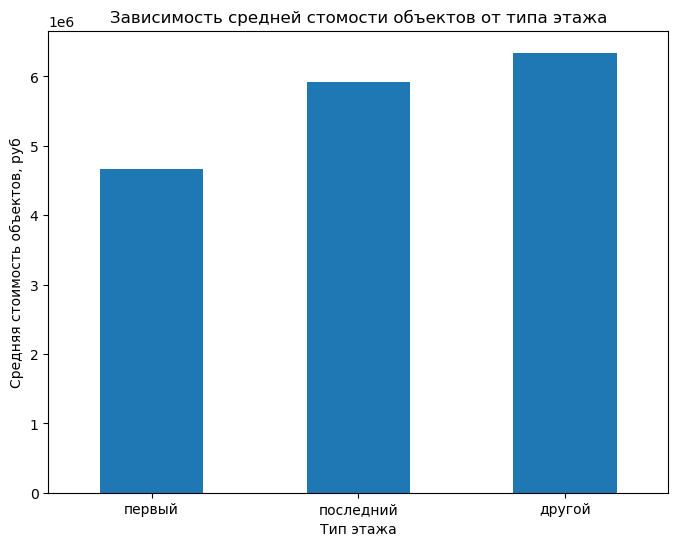

In [47]:
#создание сводной таблицы с расчётом среднего арифметического стоимости объекта в зависимости от типа этажа
data_grouped_floor = data.pivot_table(index='floor_group', values='last_price').reset_index().sort_values('last_price')

#переименование столбцов
data_grouped_floor.columns = ['floor_group', 'price_average']

#построение графика зависимости средней стоимости объекта от группы этажа
data_grouped_floor.plot(x='floor_group', y='price_average', kind='bar', figsize=(8,6), legend=False)
plt.xticks(rotation=0)
plt.title('Зависимость средней стомости объектов от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость объектов, руб');


Вывод: наименьшее среднее значение стоимости квартир приходится на объекты, расположенные на первом этаже.

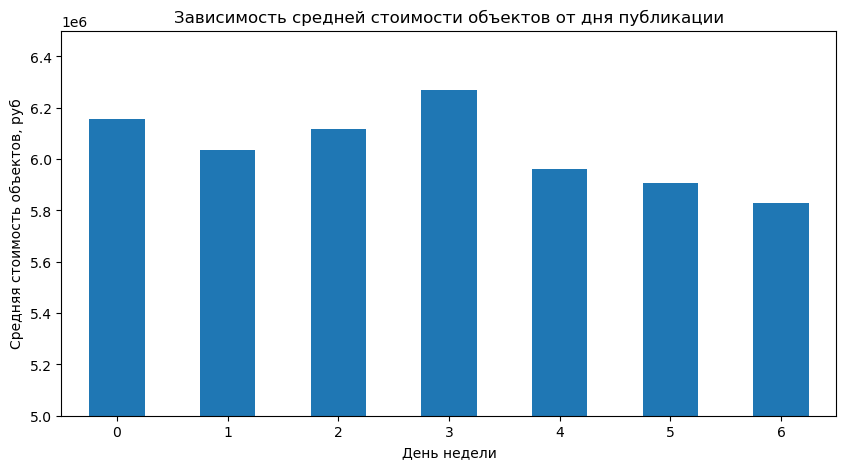

In [48]:
#создание сводной таблицы с расчётом среднего арифметического стоимости объекта в зависимости от дня публикации объявления
data_grouped_day = data.pivot_table(index='day_name', values='last_price').reset_index()

#переименование столбцов
data_grouped_day.columns = ['day_name', 'price_average']

#построение графика зависимости средней стоимости объекта от дня публикации объявления
data_grouped_day.plot(x='day_name', y='price_average', kind='bar', figsize=(10,5), legend=False)
plt.title('Зависимость средней стоимости объектов от дня публикации')
plt.xlabel('День недели')
plt.xticks(rotation=0)
plt.ylim(5000000,6500000)
plt.ylabel('Средняя стоимость объектов, руб');

Вывод: зависимость между днём публикации объявления и средней стоимости объекта не наблюдается. Среднее арифметическое примерно одинаково с незначительным снижением для квартир, опубликованных в пятницу, субботу и воскресенье.

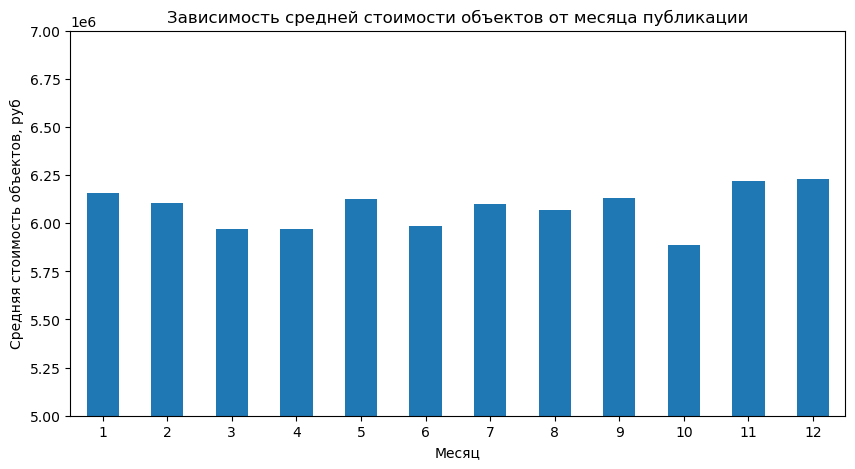

In [49]:
#создание сводной таблицы с расчётом среднего арифметического стоимости объекта в зависимости от месяца публикации объявления
data_grouped_month = data.pivot_table(index='month', values='last_price').reset_index()

#переименование столбцов
data_grouped_month.columns = ['month', 'price_average']

#построение графика зависимости средней стоимости объекта от месяца публикации объявления
data_grouped_month.plot(x='month', y='price_average', kind='bar', figsize=(10,5), legend=False)
plt.ylim(5000000,7000000)
plt.xticks(rotation=0)
plt.title('Зависимость средней стоимости объектов от месяца публикации')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость объектов, руб');

Вывод: максимальная средняя стоимость квартиры отмечается в 2014 году, в период с 2015 по 2018 средняя стоимость плавно снижалась. В 2019 году наблюдается увеличение средней цены объектов.

Общий вывод: проанализировав параметры можно сделать вывод, что параметром, который наиболее сильно влияет на стоимость квартиры, является общая площадь. Корелляция положительная, коэффициент корелляции составляет 0.766.

### Стоимость квадратного метра

In [50]:
#создание таблицы с группировкой по названию населённого пункта и расчёт средней цены квадратного метра
data_top_ten = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc={'count', 'mean'}).round(0)

#сортировка по количеству объявлений и вывод на экран первых 10 городов с наибольшим количеством объявлений
data_top_ten_sorted = data_top_ten.sort_values(by='count', ascending=False).head(10).reset_index()
data_top_ten_sorted = data_top_ten_sorted.sort_values('mean')
data_top_ten_sorted

,locality_name,count,mean
9,Выборг,235,58238.0
4,Всеволожск,391,68684.0
8,Гатчина,307,68746.0
6,Колпино,336,75356.0
3,Шушары,435,78278.0
1,Мурино,558,85440.0
7,Парголово,322,90260.0
2,Кудрово,445,95060.0
5,Пушкин,364,102930.0
0,Санкт-Петербург,15386,112860.0


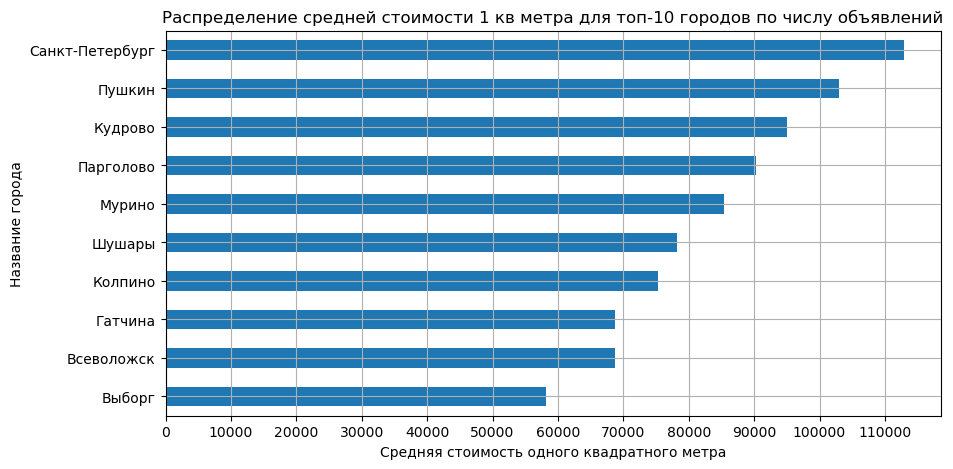

In [51]:
#построение графика средней стоимости квадратного метра для первых 10 городов с наибольшим количеством объявлений
data_top_ten_sorted.plot.barh(x='locality_name', y='mean', legend=False, grid=True, figsize=(10,5))
plt.xlabel('Cредняя стоимость одного квадратного метра')
plt.ylabel('Название города')
plt.title('Распределение средней стоимости 1 кв метра для топ-10 городов по числу объявлений')
plt.xticks(np.arange(0, 120000, 10000));

Вывод: среди первых 10 городов с наибольшим количеством объявлений максимальная стоимость одного квадратного метра отмечается в Санкт-Петербурге, минимальная - в городе Выборг. 

### Средняя цена каждого километра

In [52]:
#создание нового датафрейма для квартир, расположенных в Санкт-Петербурге 
data_St_Petersburg = data.loc[data['locality_name'] == 'Санкт-Петербург']

#построение сводной таблицы для расчёта средней цены каждого километра в зависимости от удалённости от центра
data_St_Petersburg = data_St_Petersburg.pivot_table(index='cityCentres_nearest_km', values='square_meter_price', \
                               aggfunc={'mean', 'median'}).reset_index().round(0)

data_St_Petersburg.columns = ['Расстояние от центра города, км', 'Cредняя цена','Медианная цена']
data_St_Petersburg.sample()

,"Расстояние от центра города, км",Cредняя цена,Медианная цена
20,20.0,101391.0,103118.0


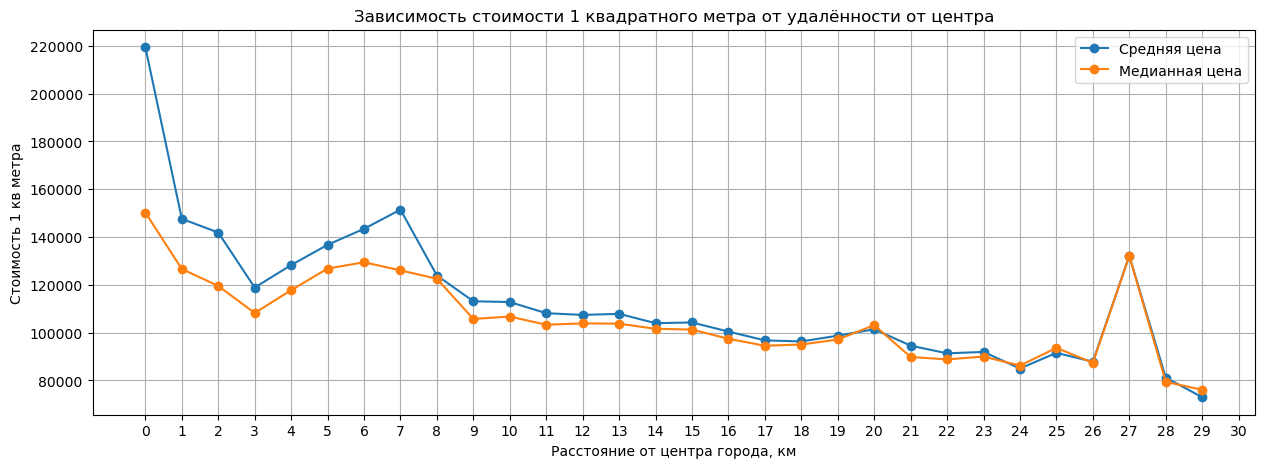

In [53]:
#построение графика зависимости среднего арифметического и медианного значения стоимости квадратного метра в зависимости от удалённости от центра
data_St_Petersburg.plot(x='Расстояние от центра города, км', y=['Cредняя цена', 'Медианная цена'], style='o-', figsize=(15, 5), grid=True)
plt.ylabel('Стоимость 1 кв метра')
plt.title('Зависимость стоимости 1 квадратного метра от удалённости от центра')
plt.xticks(np.arange(0, 31, 1));

Вывод: проанализировав график, можно сделать вывод, что, в среднем, стоимость квартиры увеличивается с приближением к центру города. Выделяется несколько пиков для квартир, расположенных на расстоянии 1, 7 и 27 км от центра города. Пики показывают, что в данных местах есть квартиры с высокой стоимостью.

# Общий вывод

В данной работе был изучен набор данных объявлений о продаже недвижимости в Санкт-Петербурге и пригороде, опубликованных за период с 2014 по 2019 года.

В процессе предобработки данных были заменены пропущенные значения и удалены аномальные данные, не влияющие на дальнейший анализ. Из первоначального массива данных было удалено ~2 % от общего количества строк.

В базе данных объявлений представлены квартиры разного ценового диапазона: от квартир за 1 млн. рублей до недвижимости за несколько сотен млн. рублей. Основной массив данных представлен 1-2х комнатными квартирами стоимостью до 10 млн рублей, расположенных с 1го по 5ый этажи и в пределах до 40 км от аэропорта.

Также были исследованы факторы, влияющие на стоимость квартиры. Было определено, что общая площадь и площадь кухни наиболее сильно влияют на конечную стоимость объекта. Наиболее дешёвые квартиры расположены на первом этаже. Средняя стоимость квартир снижалась с 2014 по 2018 года с последующим увеличением в 2019. Остальные факторы (день, месяц публикации) не влияют на стоимость квартиры. 

Дополнительно была проанализирована скорость покупки объекта с момента публикации объявления. Было определено, что чаще всего квартиры продаются в течение 200 дней с даты размещения объявления.

Среди первых 10 населённых пунктов с наибольшим количеством объявлений максимальную среднюю стоимость одного квадратного метра имеют квартиры, расположенные в Санкт-Петербурге.

Дополнительно для квартир в Санкт-Петербурге была изучена зависимость стоимости одного квадратного метра от удалённости от центра. Было отмечено снижение стоимости квадратного метра при удалении от центра города. Выделяется несколько пиков для квартир, расположенных на расстоянии 1, 7 и 27 км от центра города. Пики показывают, что в данных местах есть квартиры с высокой стоимостью.

